In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Final_Combined_Results.csv to Final_Combined_Results.csv


In [ ]:
import pandas as pd

# Load the final combined results
df = pd.read_csv("Final_Combined_Results.csv")

# Clean model names
df['Model'] = df['Model'].astype(str).str.strip()

# Group by Model and calculate mean of each metric
summary_table = df.groupby("Model").agg({
    "Accuracy": "mean",
    "Sharpe Ratio": "mean",
    "Max Drawdown (%)": "mean"
}).reset_index()

# Round for readability
summary_table = summary_table.round(3)

# Show the table
print("📊 Summary Table by Model:")
summary_table


📊 Summary Table by Model:


,Model,Accuracy,Sharpe Ratio,Max Drawdown (%)
0,Bollinger Bands,0.485,-0.218,29.094
1,LSTM,0.507,0.303,29.377
2,MACD,0.491,0.131,25.196
3,RSI,0.490,-0.088,45.536
4,TCN,0.510,0.304,27.960
5,Transformer,0.506,-0.059,33.835
6,XGBoost,0.493,-0.214,37.915


In [ ]:
summary_table.to_csv("Model_Summary_Table.csv", index=False)

from google.colab import files
files.download("Model_Summary_Table.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-2727683880.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_table, x='Model', y='Accuracy', palette='crest')
/tmp/ipython-input-2727683880.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_table, x='Model', y='Sharpe Ratio', palette='viridis')
/tmp/ipython-input-2727683880.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_table, x='Model', y='Max Drawdown (%)', palette='flare')
/tmp/ipython-input-2727683880.py:38: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing 

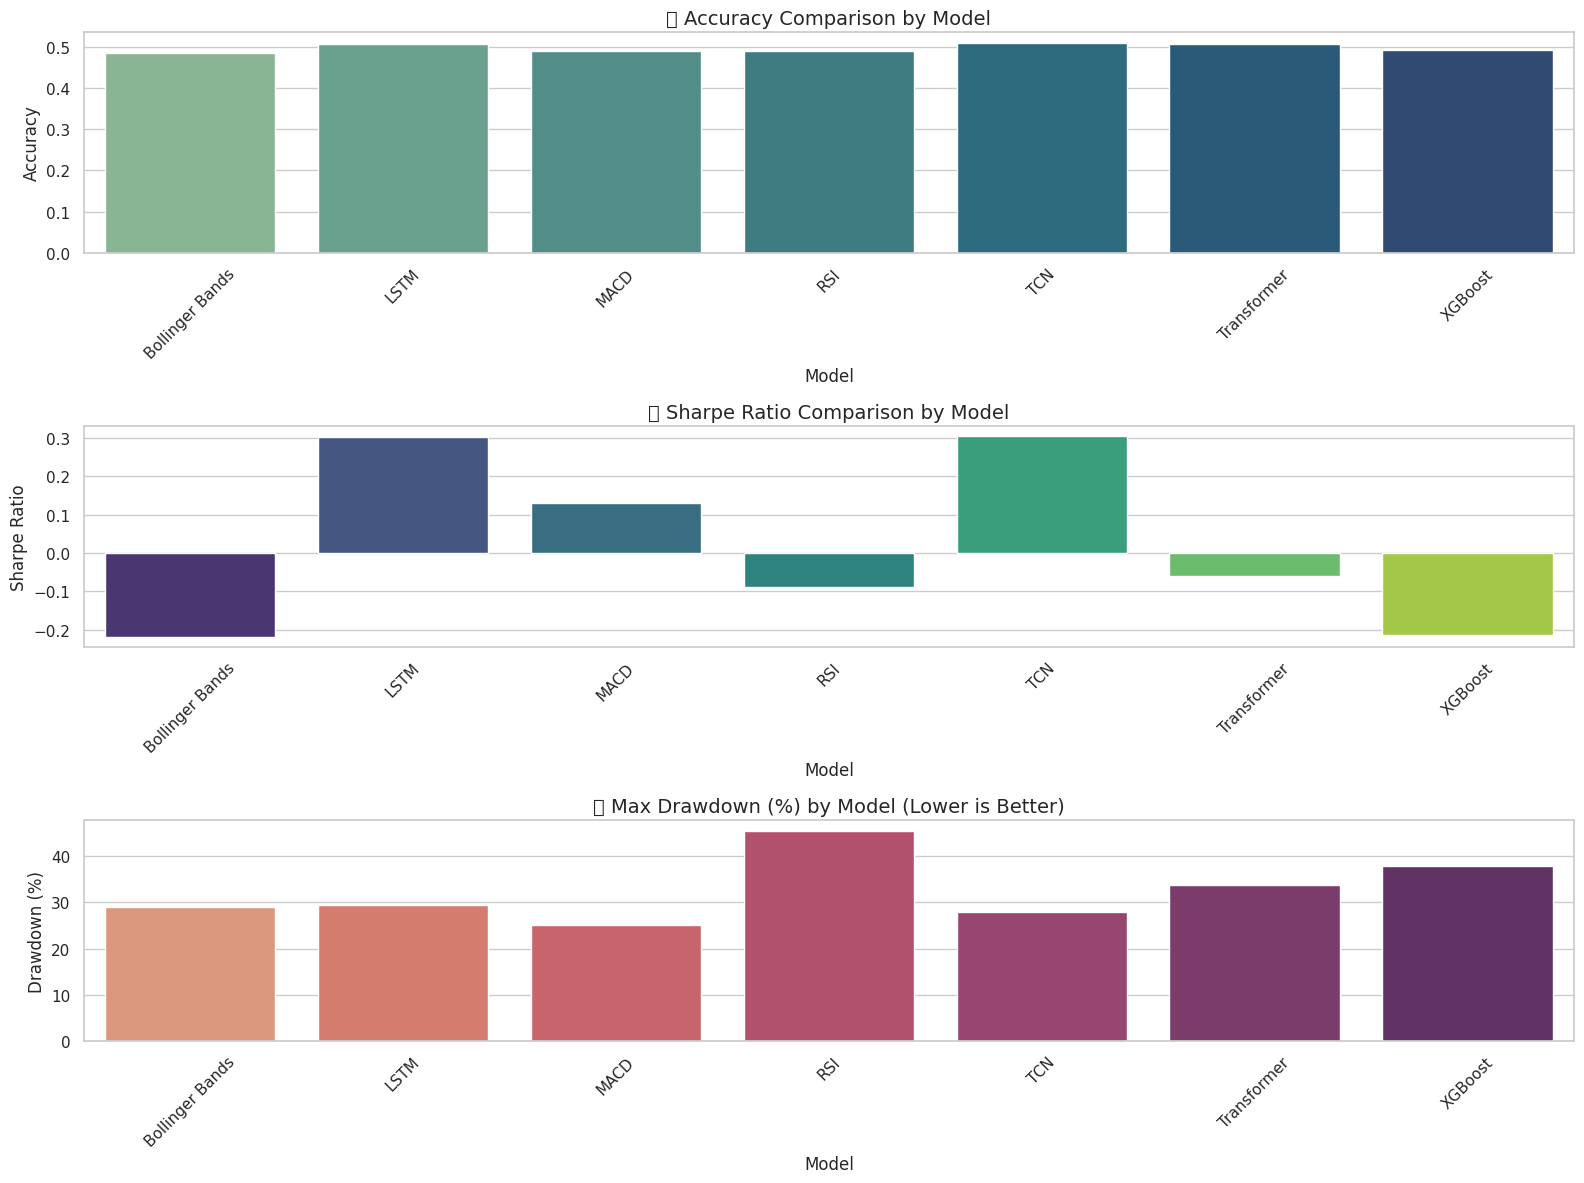

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style
sns.set(style="whitegrid")

# Plot size
plt.figure(figsize=(16, 12))

# ----------------------------
# 1. Accuracy by Model
# ----------------------------
plt.subplot(3, 1, 1)
sns.barplot(data=summary_table, x='Model', y='Accuracy', palette='crest')
plt.title('✅ Accuracy Comparison by Model', fontsize=14)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# ----------------------------
# 2. Sharpe Ratio by Model
# ----------------------------
plt.subplot(3, 1, 2)
sns.barplot(data=summary_table, x='Model', y='Sharpe Ratio', palette='viridis')
plt.title('📈 Sharpe Ratio Comparison by Model', fontsize=14)
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)

# ----------------------------
# 3. Max Drawdown by Model
# ----------------------------
plt.subplot(3, 1, 3)
sns.barplot(data=summary_table, x='Model', y='Max Drawdown (%)', palette='flare')
plt.title('📉 Max Drawdown (%) by Model (Lower is Better)', fontsize=14)
plt.ylabel('Drawdown (%)')
plt.xticks(rotation=45)

# Final layout
plt.tight_layout()
plt.show()
